In [108]:
import torch
from random import randint
from utilities import chordUtil
from utilities import dataImport
from utilities.chordUtil import *
from utilities.dataImport import *
from sklearn.model_selection import train_test_split
import os
import numpy as np
import random
import sys
import torch.nn as nn
import time
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [109]:
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [110]:
# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
print("use_cuda")
print(use_cuda)
device = torch.device("cuda:0" if use_cuda else "cpu")

use_cuda
False


In [111]:
# Init
lenSeq = 16
alpha = 'a1'
rootname = "inputs/jazz_xlab/"
filenames = os.listdir(rootname)
#filenames.remove(".DS_Store")
dictChord, listChord = chordUtil.getDictChord(eval(alpha))
print(len(dictChord))
print(dictChord)

37
{'C:min': 0, 'A:dim': 1, 'G:maj': 2, 'C#:maj': 3, 'C#:min': 4, 'A:min': 5, 'E:maj': 6, 'D#:maj': 7, 'D:maj': 8, 'F#:maj': 9, 'F#:min': 10, 'E:min': 11, 'N': 12, 'G:min': 13, 'F:maj': 14, 'A:maj': 15, 'B:min': 16, 'E:dim': 17, 'A#:min': 18, 'F:min': 19, 'G#:maj': 20, 'G#:min': 21, 'B:maj': 22, 'A#:maj': 23, 'B:dim': 24, 'D:min': 25, 'G:dim': 26, 'D#:min': 27, 'D:dim': 28, 'D#:dim': 29, 'C:maj': 30, 'F#:dim': 31, 'F:dim': 32, 'A#:dim': 33, 'G#:dim': 34, 'C#:dim': 35, 'C:dim': 36}


In [112]:
# Create datasets
files_train ,files_test = train_test_split(filenames,test_size=0.7)
dataset_train = dataImport.ChordSeqDataset(files_train, rootname, alpha, dictChord, lenSeq)
dataset_test = dataImport.ChordSeqDataset(files_test, rootname, alpha, dictChord, lenSeq)


In [113]:
# Create generators
params = {'batch_size': 64,
          'shuffle': True,
          'num_workers': 6}
training_generator = data.DataLoader(dataset_train, **params)
testing_generator = data.DataLoader(dataset_test, **params)


In [114]:
def train(local_batch, local_labels):

    optimizer.zero_grad()
    loss = 0

    local_labels = torch.tensor([torch.argmax(local_label) for local_label in local_labels])

    
    
    output, (hidden, cell_state) = lstm_nn(local_batch)

    output = output[:,-1,:]
    loss = criterion(output, local_labels)
    loss.backward()
    optimizer.step()


    return output, loss.item() / len(local_batch)

In [115]:
lstm_nn = nn.LSTM(len(dictChord), len(dictChord), batch_first = True, dropout = 0.1)

plot_every = 5
all_losses = []
total_loss = 0 # Reset every plot_every iters
start = time.time()
optimizer = torch.optim.SGD(lstm_nn.parameters(), lr = 0.0001, momentum=0.9)
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()
#learning_rate = 0.0005
print_every = 10
max_epochs = 500


# Begin training

for epoch in range(1, max_epochs):
    # Training
    for local_batch, local_labels in training_generator:
        # Transfer to GPU
        local_batch, local_labels = local_batch.to(device), local_labels.to(device)
        
        output, loss = train(local_batch, local_labels)
        total_loss += loss

    if epoch % print_every == 0:
        print('%s (%d %d%%) %.4f' % (timeSince(start), epoch, epoch / max_epochs * 100, loss))

    if epoch % plot_every == 0:
        all_losses.append(total_loss / (plot_every * len(local_batch)))
        total_loss = 0
        

    # Testing
    #for local_batch, local_labels in testing_generator:
        # Transfer to GPU
        #local_batch, local_labels = local_batch.to(device), local_labels.to(device)

        # //// Test the model  ////

/home/valentinbilot/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


0m 4s (10 2%) -0.0004
0m 9s (20 4%) -0.0003
0m 14s (30 6%) 0.0003
0m 19s (40 8%) -0.0021
0m 23s (50 10%) -0.0031
0m 28s (60 12%) -0.0027
0m 32s (70 14%) -0.0020
0m 37s (80 16%) -0.0036
0m 42s (90 18%) -0.0022
0m 46s (100 20%) -0.0041
0m 51s (110 22%) -0.0041
0m 56s (120 24%) -0.0038
1m 0s (130 26%) -0.0044
1m 5s (140 28%) -0.0049
1m 9s (150 30%) -0.0049
1m 14s (160 32%) -0.0055
1m 19s (170 34%) -0.0041
1m 23s (180 36%) -0.0053
1m 28s (190 38%) -0.0081
1m 32s (200 40%) -0.0057
1m 37s (210 42%) -0.0058
1m 42s (220 44%) -0.0059
1m 47s (230 46%) -0.0070
1m 51s (240 48%) -0.0047
1m 56s (250 50%) -0.0063
2m 0s (260 52%) -0.0063
2m 5s (270 54%) -0.0067
2m 10s (280 56%) -0.0067
2m 15s (290 57%) -0.0083
2m 19s (300 60%) -0.0063
2m 24s (310 62%) -0.0061
2m 28s (320 64%) -0.0102
2m 33s (330 66%) -0.0096
2m 38s (340 68%) -0.0087
2m 42s (350 70%) -0.0086
2m 47s (360 72%) -0.0085
2m 52s (370 74%) -0.0099
2m 57s (380 76%) -0.0096
3m 2s (390 78%) -0.0069
3m 7s (400 80%) -0.0107
3m 12s (410 82%) -0.009

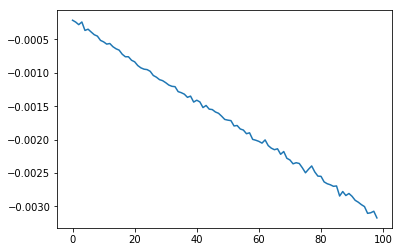

In [116]:
plt.figure()
plt.plot(all_losses)
plt.show()

In [117]:
test_sequence = ["C:maj","F:maj","C:maj","C:maj","F:maj","F:maj","C:maj","C:maj","G:maj","F:maj","C:maj","G:maj","C:maj","C:maj","F:maj","C:maj"]

test_sequence_tensor = torch.zeros(1, len(test_sequence), len(dictChord))
for t in range(len(test_sequence)):
    test_sequence_tensor[0, t, dictChord[test_sequence[t]]] = 1


In [118]:
generation_lenght = 120

generated_sequence = [0 for i in range(generation_lenght)]
generated_sequence[0:lenSeq] = test_sequence

for t in range(generation_lenght-lenSeq):
    if t == 0:
        output, (hidden, cell_state) = lstm_nn(test_sequence_tensor)
        generated_sequence[t+lenSeq] = listChord[torch.argmax(output[0,-1]).item()]
        
    else : 
        last_chords_output = torch.zeros(1, lenSeq, len(dictChord))
        for i in range(lenSeq):
            last_chords_output[0, i, torch.argmax(output[0][-1]).item()] = 1
        #last_chords_output = torch.tensor([[torch.argmax(output[0][i]).item() for i in range(lenSeq)]])
        output, (hidden, cell_state) = lstm_nn(last_chords_output, (hidden, cell_state))
        generated_sequence[t+lenSeq] = listChord[torch.argmax(output[0][-1]).item()]

        
for i in range(generation_lenght):
    if i%8 == 0:
        print(generated_sequence[i:i+8])

['C:maj', 'F:maj', 'C:maj', 'C:maj', 'F:maj', 'F:maj', 'C:maj', 'C:maj']
['G:maj', 'F:maj', 'C:maj', 'G:maj', 'C:maj', 'C:maj', 'F:maj', 'C:maj']
['F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj']
['F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj']
['F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj']
['F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj']
['F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj']
['F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj']
['F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj']
['F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj']
['F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj']
['F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj']
['F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj']
['F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:maj', 'F:ma